<h1><b>House Price Prediction Using Linear Regression</b></h1>

<h2>1. Importing Libraries</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
%matplotlib inline

<h2>2. Loading and Analysing the Dataset</h2>

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


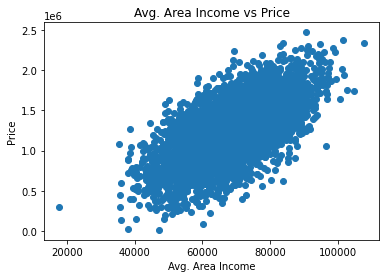

In [39]:
plt.title('Avg. Area Income vs Price')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.scatter(USAhousing['Avg. Area Income'], USAhousing['Price'])

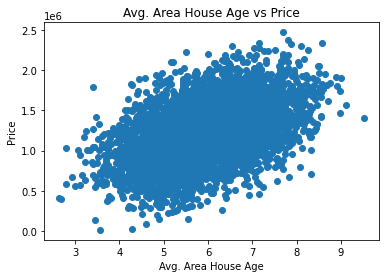

In [5]:
plt.title('Avg. Area House Age vs Price')
plt.xlabel('Avg. Area House Age')
plt.ylabel('Price')
plt.scatter(USAhousing['Avg. Area House Age'], USAhousing['Price'])

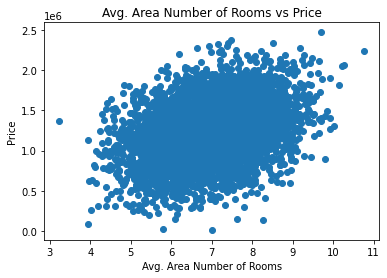

In [40]:
plt.title('Avg. Area Number of Rooms vs Price')
plt.xlabel('Avg. Area Number of Rooms')
plt.ylabel('Price')
plt.scatter(USAhousing['Avg. Area Number of Rooms'], USAhousing['Price'])

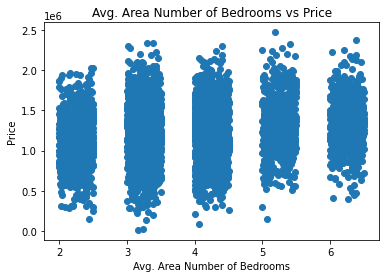

In [41]:
plt.title('Avg. Area Number of Bedrooms vs Price')
plt.xlabel('Avg. Area Number of Bedrooms')
plt.ylabel('Price')
plt.scatter(USAhousing['Avg. Area Number of Bedrooms'], USAhousing['Price'])

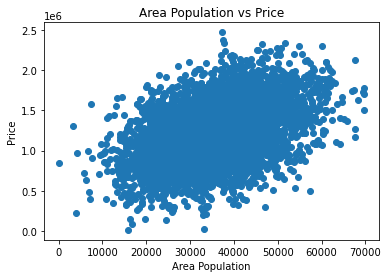

In [43]:
plt.title('Area Population vs Price')
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.scatter(USAhousing['Area Population'], USAhousing['Price'])

<h2>3. Preparing and Splitting Data</h2>

In [6]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>4. Creating and Training Model</h2>

In [8]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<h2>5. Model Result</h2>

In [9]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.652206
Avg. Area House Age,164666.480722
Avg. Area Number of Rooms,119624.012232
Avg. Area Number of Bedrooms,2440.377611
Area Population,15.270313


In [10]:
predicted = model.predict(X_test)
result = []
for i in y_test[:10].keys():
    result.append(y_test[i])
x = pd.DataFrame({'Predicted Value': predicted[:10], 'Expected Value': result})
x

,Predicted Value,Expected Value
0,1.308588e+06,1.339096e+06
1,1.237037e+06,1.251794e+06
2,1.243429e+06,1.340095e+06
3,1.228900e+06,1.431508e+06
4,1.063321e+06,1.042374e+06
5,1.544058e+06,1.555321e+06
6,1.094775e+06,1.250882e+06
7,8.332847e+05,1.039381e+06
8,7.884129e+05,8.324752e+05
9,1.469715e+06,1.420648e+06


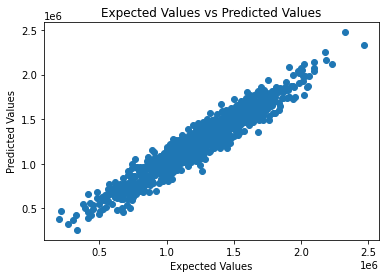

In [53]:
plt.title('Expected Values vs Predicted Values')
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.scatter(y_test, predicted)

<h2>6. Error Analysis</h2>

In [54]:
pd.DataFrame({'Error Values': (y_test - predicted)})

,Error Values
1501,30508.150248
2586,14756.949343
2653,96665.625898
1055,202607.409824
705,-20947.383011
...,...
4711,64128.670938
2313,86973.442133
3214,54154.099527
2732,-92370.326701


In [47]:
mape = metrics.mean_absolute_percentage_error(y_test, predicted)
print("Mean absolute percentage error regression loss =", mape)
mpe = metrics.mean_absolute_error(y_test, predicted)
print("Mean absolute error regression loss =", mpe)
mse = metrics.mean_squared_error(y_test, predicted)
print("Mean squared error regression loss =", mse)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
print("Root mean squared error regression loss =", rmse)

Mean absolute percentage error regression loss = 0.07387838859753285
Mean absolute error regression loss = 80879.09723486962
Mean squared error regression loss = 10089009300.890661
Root mean squared error regression loss = 100444.06055556824
